In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
df = pd.read_csv('hyundai1.csv', sep=',')
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size
0,1,2017.0,7999.0,1,17307.00000,2,145.0,58.9,1.2
1,10,2017.0,14100.0,2,27299.00000,0,145.0,57.6,1.7
2,0,2017.0,7495.0,1,25203.00000,2,30.0,57.7,1.2
3,6,2013.0,6998.0,1,72893.96871,0,145.0,53.3,1.7
4,10,2016.0,11998.0,1,36512.00000,0,30.0,61.7,1.7
...,...,...,...,...,...,...,...,...,...
330,10,2017.0,13000.0,1,26685.00000,0,30.0,61.7,1.7
331,9,2017.0,18999.0,0,20599.00000,0,150.0,42.8,2.2
332,10,2019.0,15498.0,1,23773.00000,2,145.0,34.9,1.6
333,5,2017.0,9998.0,1,9604.00000,2,145.0,50.4,1.4


In [114]:
df.describe()

,model,year,price,type,distance,fuel,tax,miles per galoon,size
count,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000,335.000000
mean,5.641791,2016.856365,11793.132491,0.967164,23804.958022,1.134328,114.035833,53.754030,1.494925
std,4.016812,1.617895,3939.153774,0.381609,15610.386090,0.977218,61.191625,11.115859,0.373130
min,0.000000,2011.941133,3799.000000,0.000000,10.000000,0.000000,0.000000,28.000000,1.000000
25%,2.000000,2016.000000,8299.000000,1.000000,12246.500000,0.000000,30.000000,44.800000,1.200000
50%,6.000000,2017.000000,11998.000000,1.000000,20746.000000,2.000000,145.000000,55.400000,1.600000
75%,10.000000,2018.000000,14549.500000,1.000000,35001.500000,2.000000,145.000000,61.700000,1.700000
max,11.000000,2020.000000,24502.192168,2.000000,72893.968710,2.000000,298.502068,78.500000,2.500000


In [115]:
df['age']=(2021-df['year'])
df['priceLevel']=np.where (df['price']<=11793,0,1)
df

,model,year,price,type,distance,fuel,tax,miles per galoon,size,age,priceLevel
0,1,2017.0,7999.0,1,17307.00000,2,145.0,58.9,1.2,4.0,0
1,10,2017.0,14100.0,2,27299.00000,0,145.0,57.6,1.7,4.0,1
2,0,2017.0,7495.0,1,25203.00000,2,30.0,57.7,1.2,4.0,0
3,6,2013.0,6998.0,1,72893.96871,0,145.0,53.3,1.7,8.0,0
4,10,2016.0,11998.0,1,36512.00000,0,30.0,61.7,1.7,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...
330,10,2017.0,13000.0,1,26685.00000,0,30.0,61.7,1.7,4.0,1
331,9,2017.0,18999.0,0,20599.00000,0,150.0,42.8,2.2,4.0,1
332,10,2019.0,15498.0,1,23773.00000,2,145.0,34.9,1.6,2.0,1
333,5,2017.0,9998.0,1,9604.00000,2,145.0,50.4,1.4,4.0,0


In [116]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df, columns = ['model','year','price','type','distance','fuel','tax','miles per galoon', 'size', 'age', 'priceLevel']).round()

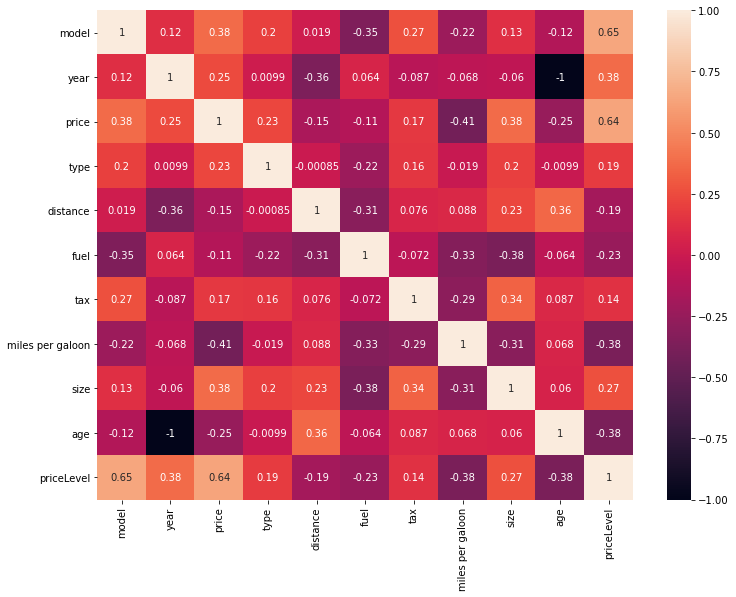

In [117]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

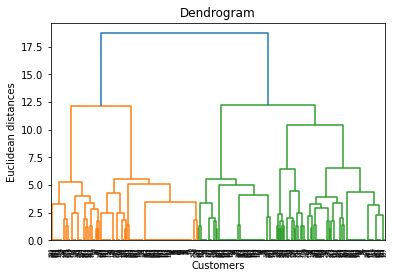

In [118]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [119]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [120]:
hc

array([4, 0, 4, 3, 0, 3, 3, 0, 4, 1, 3, 2, 1, 0, 4, 0, 1, 4, 2, 4, 4, 4,
       2, 2, 0, 4, 4, 3, 2, 1, 4, 0, 4, 3, 2, 1, 1, 4, 1, 2, 4, 2, 2, 4,
       2, 0, 4, 2, 0, 2, 3, 0, 4, 3, 0, 2, 0, 4, 4, 4, 3, 0, 4, 4, 1, 4,
       4, 0, 4, 2, 0, 1, 4, 2, 3, 4, 3, 4, 3, 0, 2, 4, 4, 2, 2, 4, 0, 0,
       3, 4, 3, 4, 4, 2, 1, 4, 0, 4, 2, 2, 4, 0, 1, 0, 2, 0, 4, 1, 2, 1,
       3, 0, 0, 4, 4, 4, 4, 0, 0, 2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 4,
       4, 0, 4, 4, 4, 4, 3, 2, 2, 1, 0, 1, 0, 4, 2, 4, 3, 2, 1, 4, 4, 0,
       2, 0, 0, 3, 2, 4, 2, 4, 2, 2, 3, 0, 0, 0, 0, 4, 1, 0, 4, 2, 3, 4,
       3, 2, 4, 1, 2, 3, 2, 4, 0, 2, 4, 4, 3, 2, 0, 4, 3, 4, 0, 4, 2, 2,
       4, 2, 4, 0, 1, 0, 0, 0, 0, 4, 4, 1, 0, 3, 4, 2, 3, 2, 0, 3, 0, 0,
       2, 0, 4, 4, 3, 4, 0, 2, 4, 0, 2, 2, 4, 2, 3, 0, 3, 0, 0, 4, 4, 4,
       0, 4, 0, 4, 2, 0, 3, 4, 0, 3, 4, 4, 3, 4, 0, 3, 2, 2, 4, 0, 4, 2,
       2, 4, 3, 2, 0, 1, 0, 1, 2, 4, 3, 0, 0, 3, 3, 0, 1, 4, 0, 3, 1, 0,
       2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 4, 4, 3, 2, 3,

In [121]:
# Less features
X = df.iloc[:, [2,7,9]]

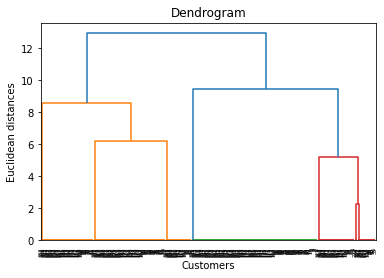

In [122]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [123]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [124]:
# Export hc clusters
import pickle
obj = {'hc': hc}
output = open('1-hyundai-cluster.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()